# Vehicle Data for CPS Research from Libpanda
*A short tutorial*

The goal of this tutorial is to provide straightforward examples to generate the plots used in the talk, "Vehicle Data for CPS Research from Libpanda"

(c) 2023, Jonathan Sprinkle, Vanderbilt University
License: BSD

Additional Authors: Rahul Bhadani, Matt Nice, Matt Bunting
See https://jmscslgroup.github.io/strym/ and https://jmscslgroup.github.io/libpanda/


# Get files useful for displaying the results

In your local folder, download files from http://dx.doi.org/10.25739/7wqk-sz60 

* 2020-07-08-20-22-14_Toyota_CAN_Messages.csv - CAN data from Toyota Rav4
* 2020-07-08-20-22-14_Toyota_GPS_Messages.csv - GPS data from Toyota Rav4
* 2020-07-08-20-22-16_Honda_CAN_Messages.csv - CAN data from Honda Pilot
* 2020-07-08-20-22-16_Honda_GPS_Messages.csv - GPS data from Honda Pilot


In [18]:
# load basic strym stuff; 
# if you don't have strym, try:
# !pip install strym
# or
# !pip install strym-lite
# (either way: restart your kernel)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import strym
from strym import strymread
from strym import strymmap
from strym import meta

toyota = "2020-07-08-20-22-14_Toyota"
toyota_can_file = toyota + "_CAN_Messages.csv"
toyota_gps_file = toyota + "_GPS_Messages.csv"
toyota_dashcam_A = toyota + "_dashcamA.mp4"
toyota_dashcam_B = toyota + "_dashcamB.mp4"

honda = "2020-07-08-20-22-16_Honda"
honda_can_file = honda + "_CAN_Messages.csv"
honda_gps_file = honda + "_GPS_Messages.csv"
honda_dashcam = honda + "_dashcam.mp4"

## Read the CSV file using `strymread`

This function gives you a vehicle-independent way to look at data from a car. 

In [6]:
r_toyota = strymread(csvfile=toyota_can_file)
r_honda = strymread(csvfile=honda_can_file)
# we will subtract by 7200s = 2hours as Toyota's time was in CDT
r_toyota.dataframe['Time'] = r_toyota.dataframe['Time'] - 7200 

Where did the cars drive? Let's see:

In [7]:
g_toyota = strymmap(toyota_gps_file)
g_honda = strymmap(honda_gps_file)

[2023_05_09_14_22_43] (root) INFO: Reading GPS file 2020-07-08-20-22-14_Toyota_GPS_Messages.csv
GPS signal first acquired at 2020-07-08 22:22:14:500000
[2023_05_09_14_22_43] (root) INFO: Reading GPS file 2020-07-08-20-22-16_Honda_GPS_Messages.csv
GPS signal first acquired at 2020-07-08 22:22:16:100000


In [15]:
g_toyota.plotroute()

Trust me: the honda basically went to the same places. Let's look at a few pieces of info:

# Plot timeseries of interest, in a couple different ways.
Starting with the Toyota timeseries, let's look at some key values, and how to plot them piece by piece

In [23]:
# tell me a little about this drive
t_metadata = meta(csvfile=toyota_can_file)

Reading 2020-07-08-20-22-14_Toyota_CAN_Messages.csv
No valid vin..continuing as Toyota
Error finding correct dbcfile, will use Toyota Version


In [28]:
print(t_metadata.toJSON())

{'filepath': '2020-07-08-20-22-14_Toyota_CAN_Messages.csv', 'filename': '2020-07-08-20-22-14_Toyota_CAN_Messages.csv', 'vin': 'VIN not part of filename', 'date': 'Wed Jul  8 22:22:14 2020', 'distance_km': 16.303169573915007, 'distance_miles': 10.107965135827303, 'duration_s': 938.8983860015869}


In [35]:
r_toyota.dataframe

,Time,Bus,MessageID,Message,MessageLength
Clock,,,,,
2020-07-09 03:22:14.400283136,1.594258e+09,0,295,0010000806303cba,8
2020-07-09 03:22:14.400283136,1.594258e+09,0,37,00000000f000001d,8
2020-07-09 03:22:14.400283136,1.594258e+09,0,36,020201fa421180fe,8
2020-07-09 03:22:14.401134848,1.594258e+09,0,180,00000000e111a452,8
2020-07-09 03:22:14.402644992,1.594258e+09,0,170,2c002c1b2c6d2beb,8
...,...,...,...,...,...
2020-07-09 03:37:53.294722048,1.594259e+09,1,442,497ffc00000ffc92,8
2020-07-09 03:37:53.295520000,1.594259e+09,1,443,497ffc00000ffc93,8
2020-07-09 03:37:53.297029888,1.594259e+09,0,560,0000000400003d,7


In [29]:
r_toyota.count()

,MessageID,Counts_Bus_0,Counts_Bus_1,TotalCount
36,36,72344,0,72344
37,37,72344,0,72344
166,166,72344,0,72344
170,170,72344,0,72344
180,180,36172,0,36172
...,...,...,...,...
1779,1779,939,0,939
1786,1786,313,0,313
1787,1787,313,0,313
1788,1788,313,0,313


Text(0.5, 1.0, 'Speed of Toyota Vehicle (km/hr)')

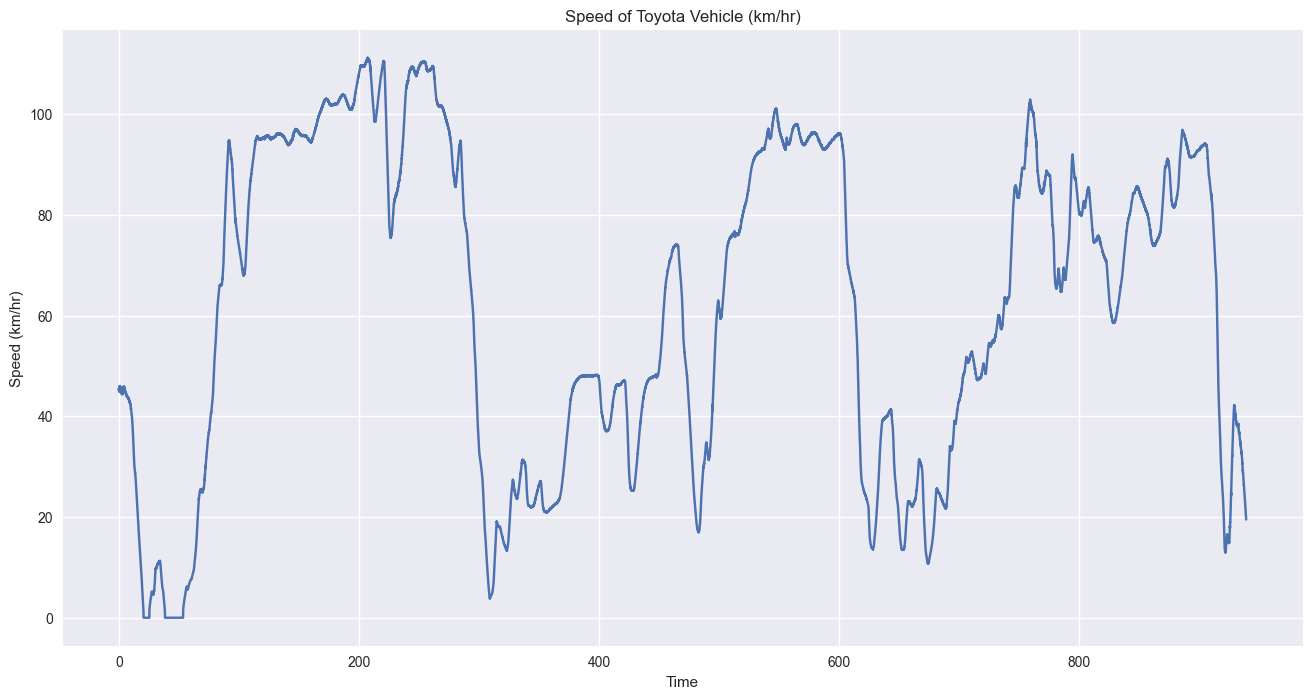

In [14]:
# extract the speed
t_speed = r_toyota.speed()
# plot relative timeseries since first data value received.
# .Time: time value, .Message: speed value for this timeseries
plt.plot(t_speed.Time-t_speed.iloc[0].Time,t_speed.Message)
plt.xlabel('Time')
plt.ylabel('Speed (km/hr)')
plt.title('Speed of Toyota Vehicle (km/hr)')

In [40]:
t_accelx = r_toyota.accelx()
t_accely = r_toyota.accely()

(Text(0.5, 0, 'Time (s)'),
 Text(0, 0.5, 'Acceleration in x (raw)'),
 Text(0.5, 1.0, 'Acceleration (in x), raw data'))

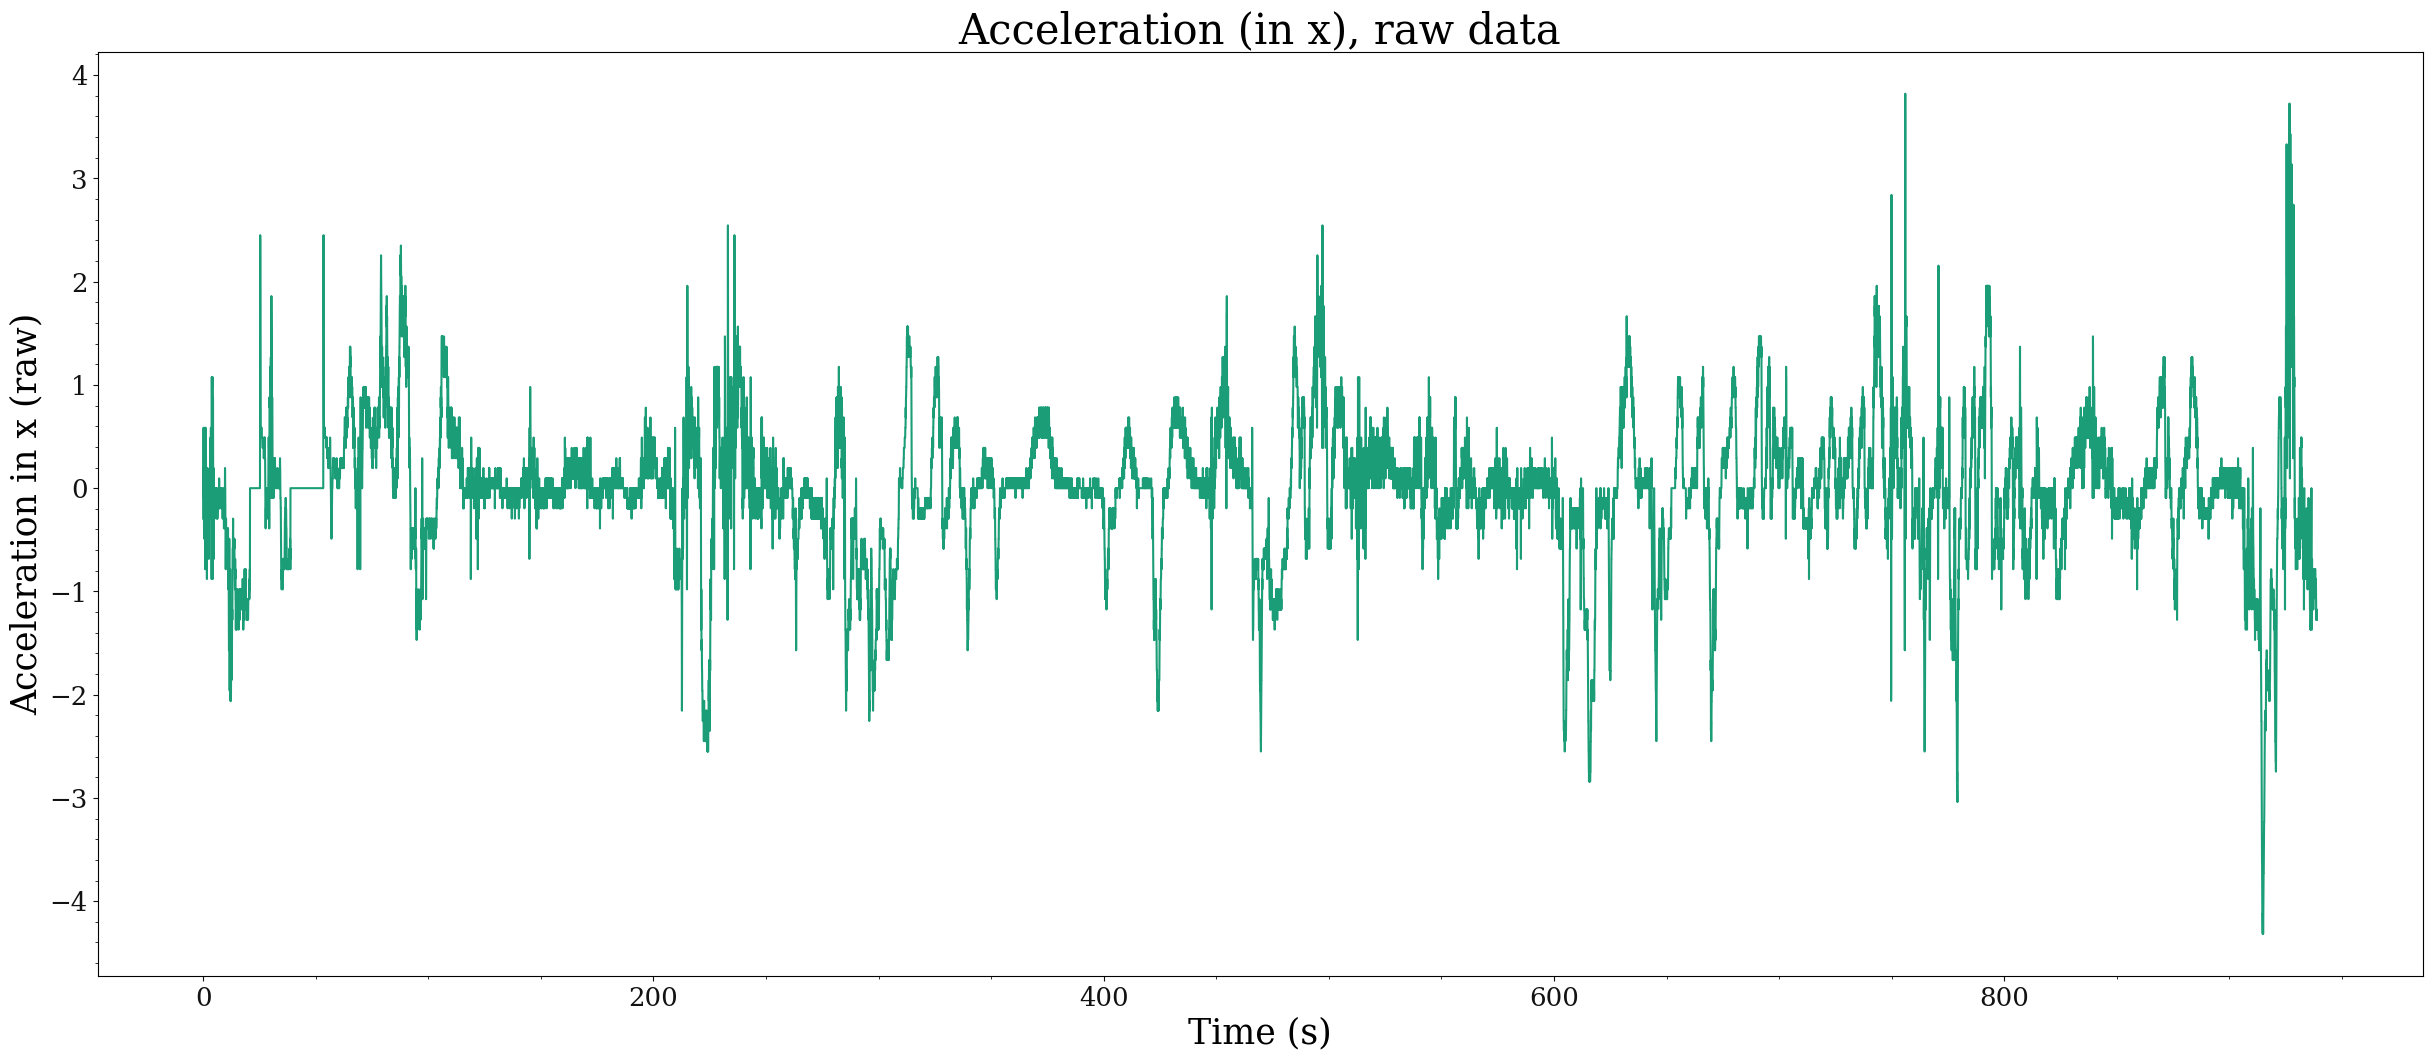

In [43]:
plt.plot(t_accelx.Time - t_accelx.iloc[0].Time, t_accelx.Message)
plt.xlabel('Time (s)'), plt.ylabel('Acceleration in x (raw)'), plt.title('Acceleration (in x), raw data')

(Text(0.5, 0, 'Time (s)'),
 Text(0, 0.5, 'Acceleration in y (raw)'),
 Text(0.5, 1.0, 'Acceleration (in y), raw data'))

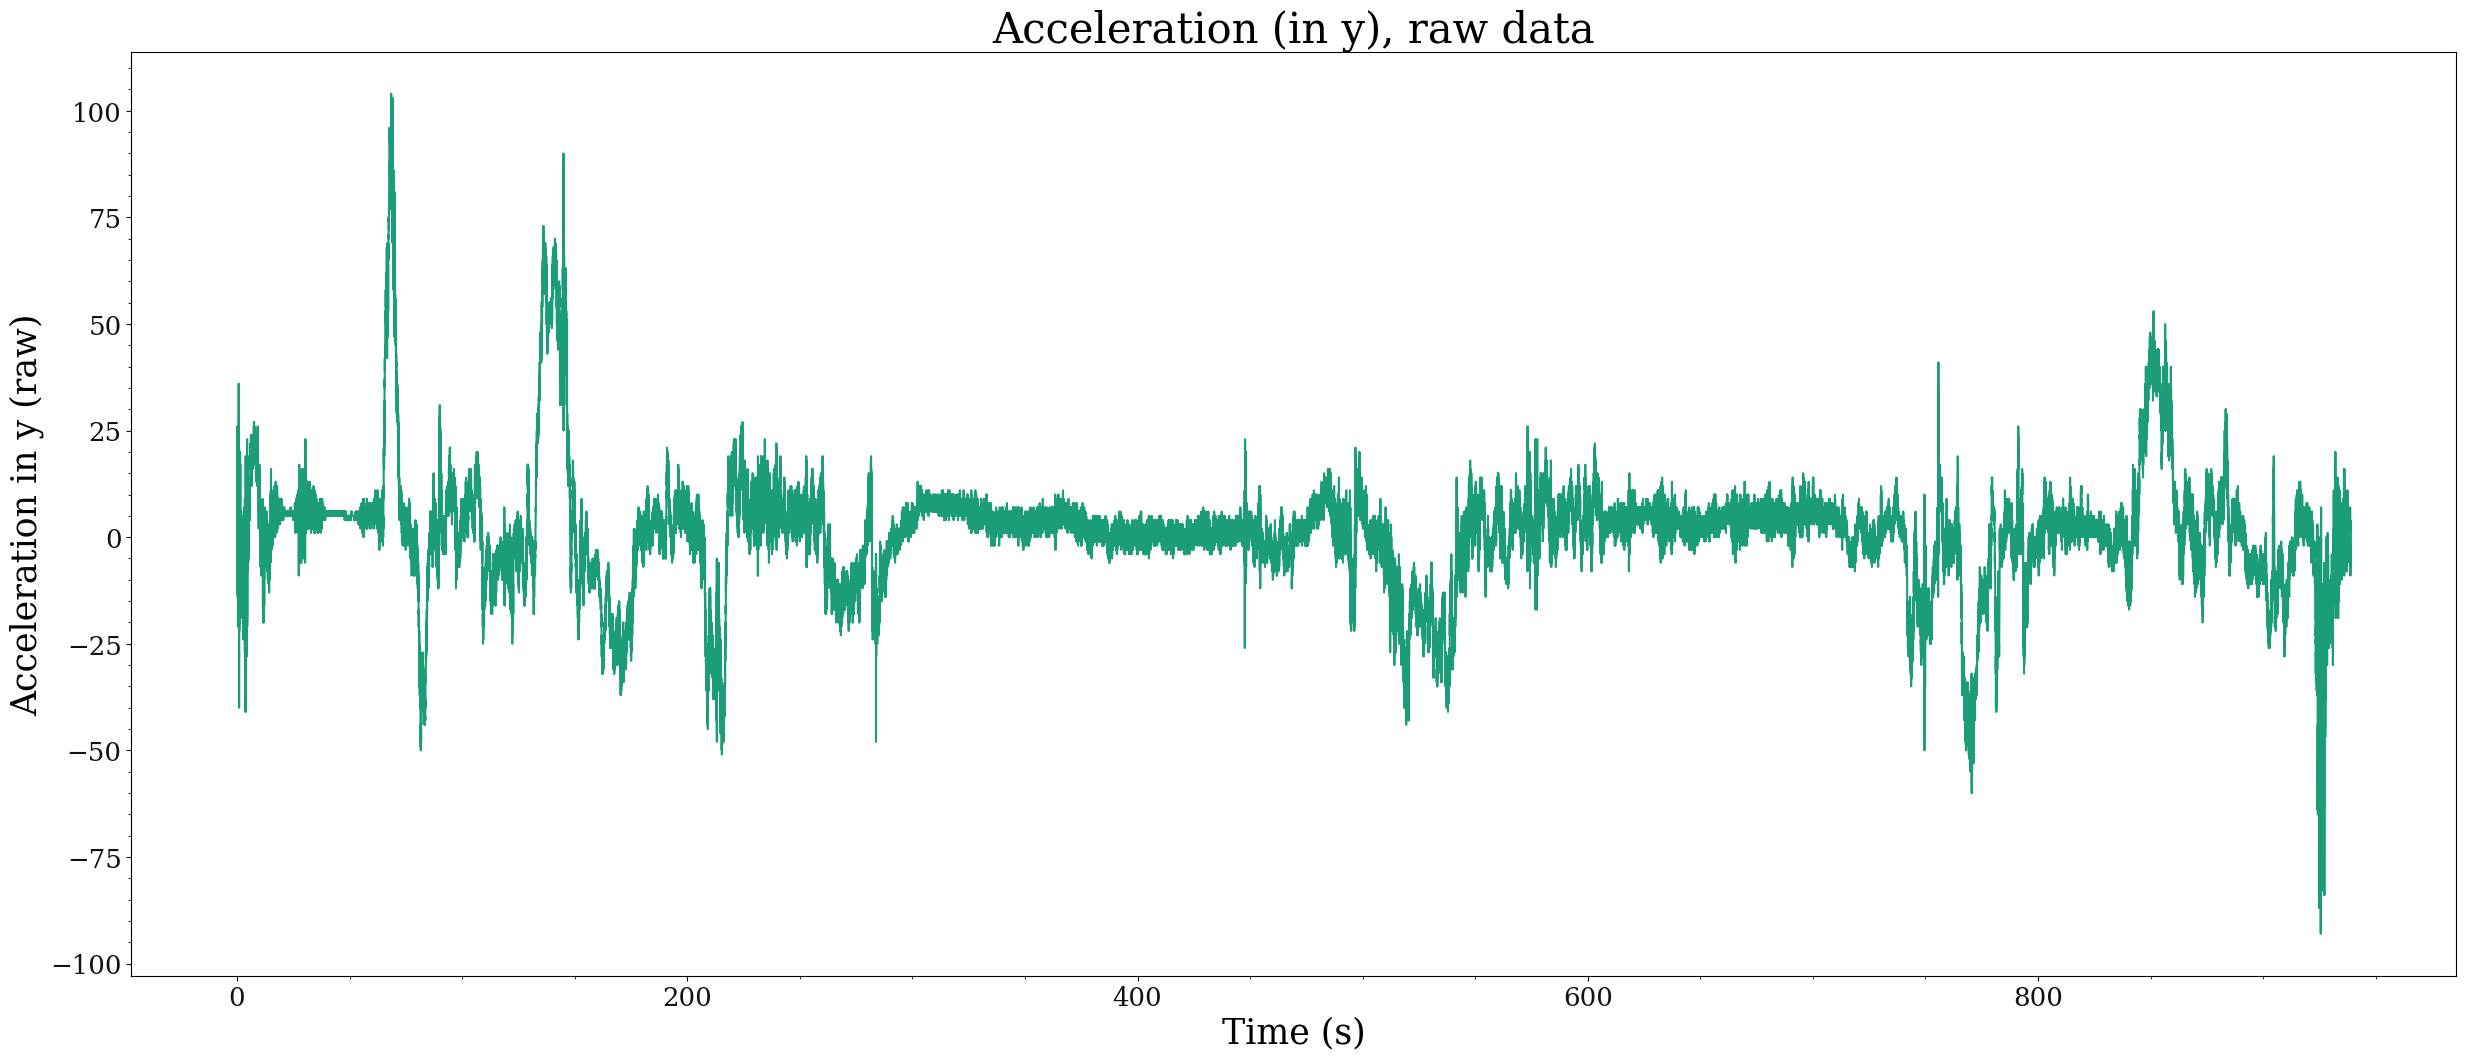

In [44]:
plt.plot(t_accely.Time - t_accely.iloc[0].Time, t_accely.Message)
plt.xlabel('Time (s)'), plt.ylabel('Acceleration in y (raw)'), plt.title('Acceleration (in y), raw data')

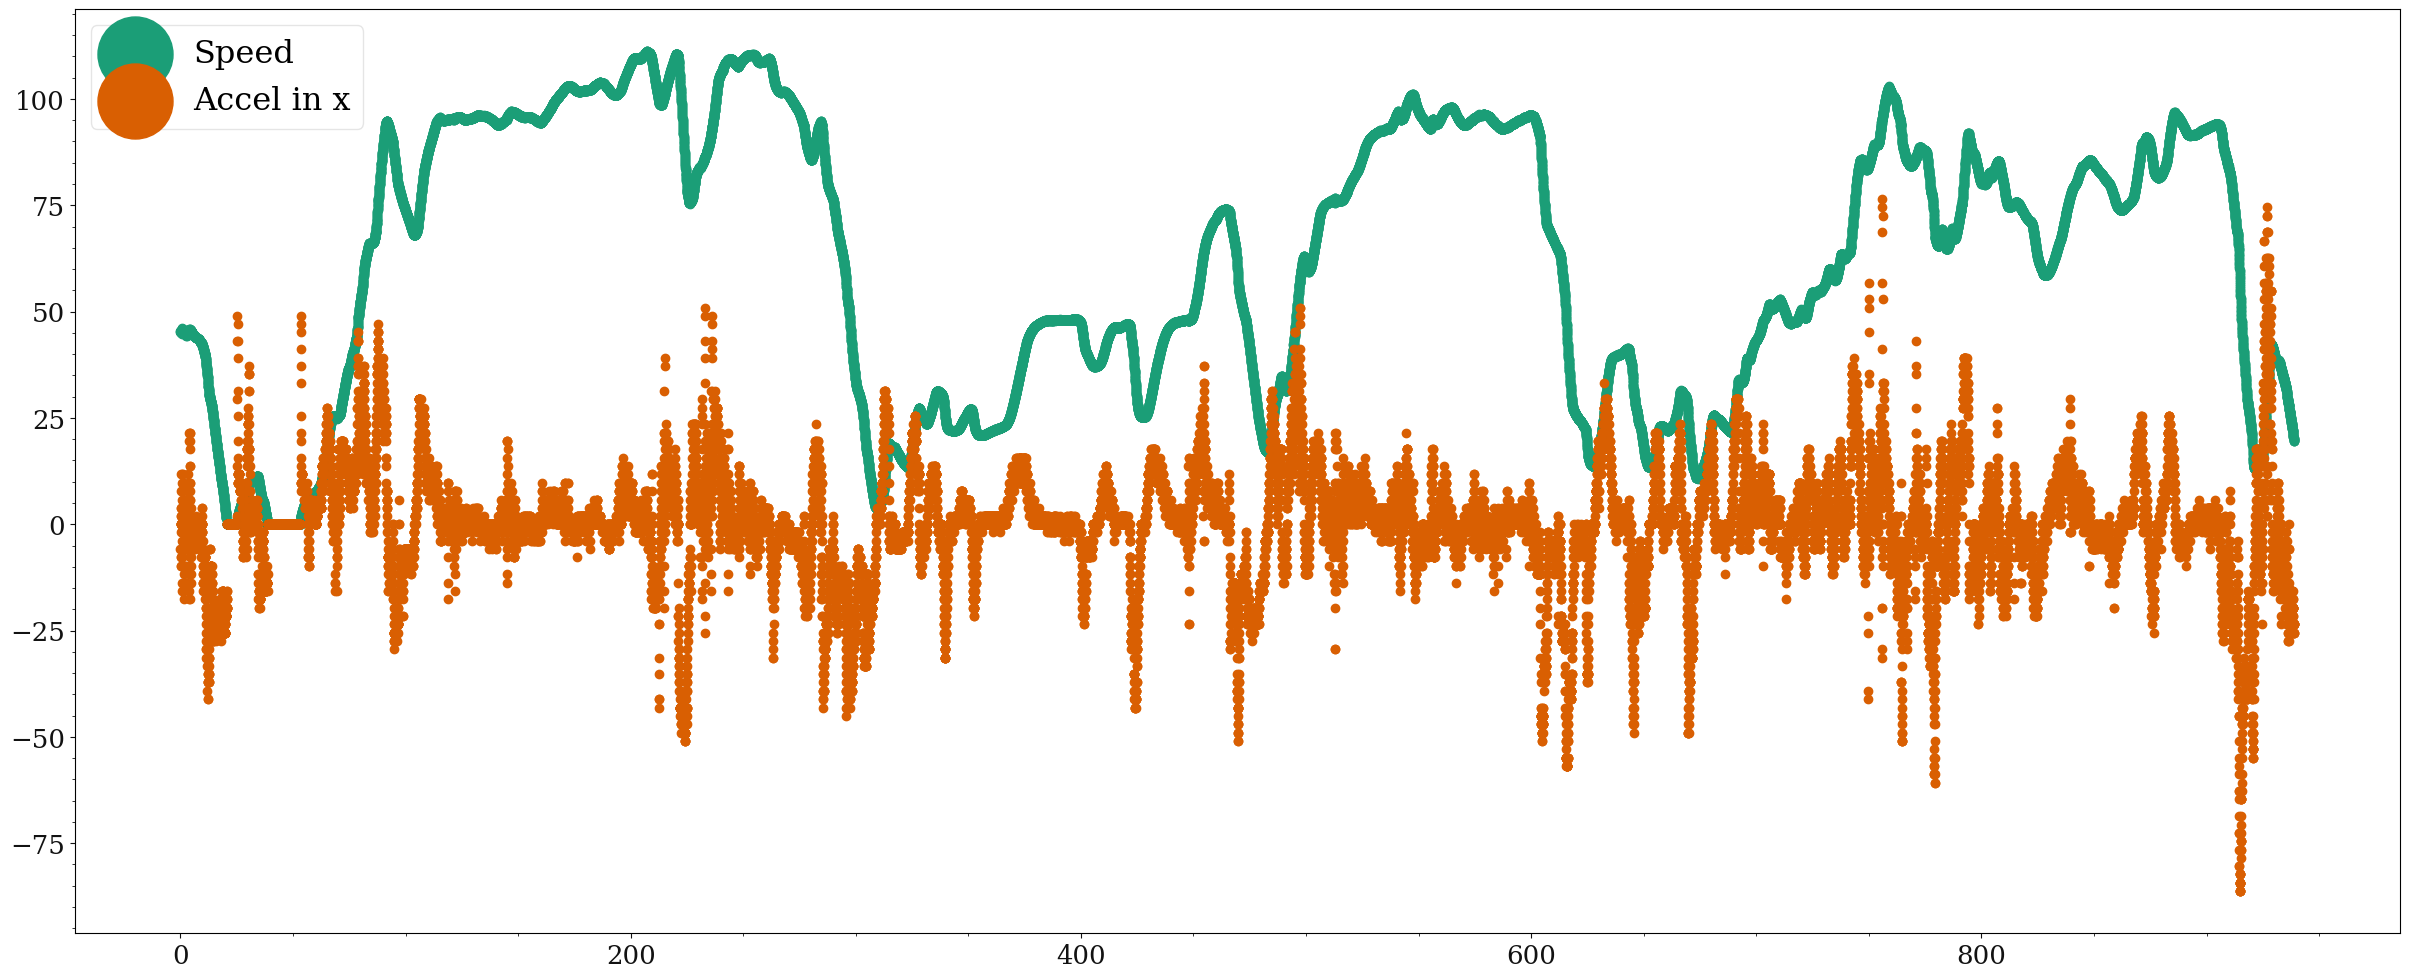

In [54]:
t0 = t_speed.iloc[0].Time
plt.scatter(x = t_speed.Time-t0, y = t_speed.Message, label='Speed')
plt.scatter(x = t_accelx.Time-t0, y = t_accelx.Message*20, label='Accel in x')
# plt.scatter(x = t_accely.Time-t0, y = t_accely.Message, label='Accel in y')
plt.legend()

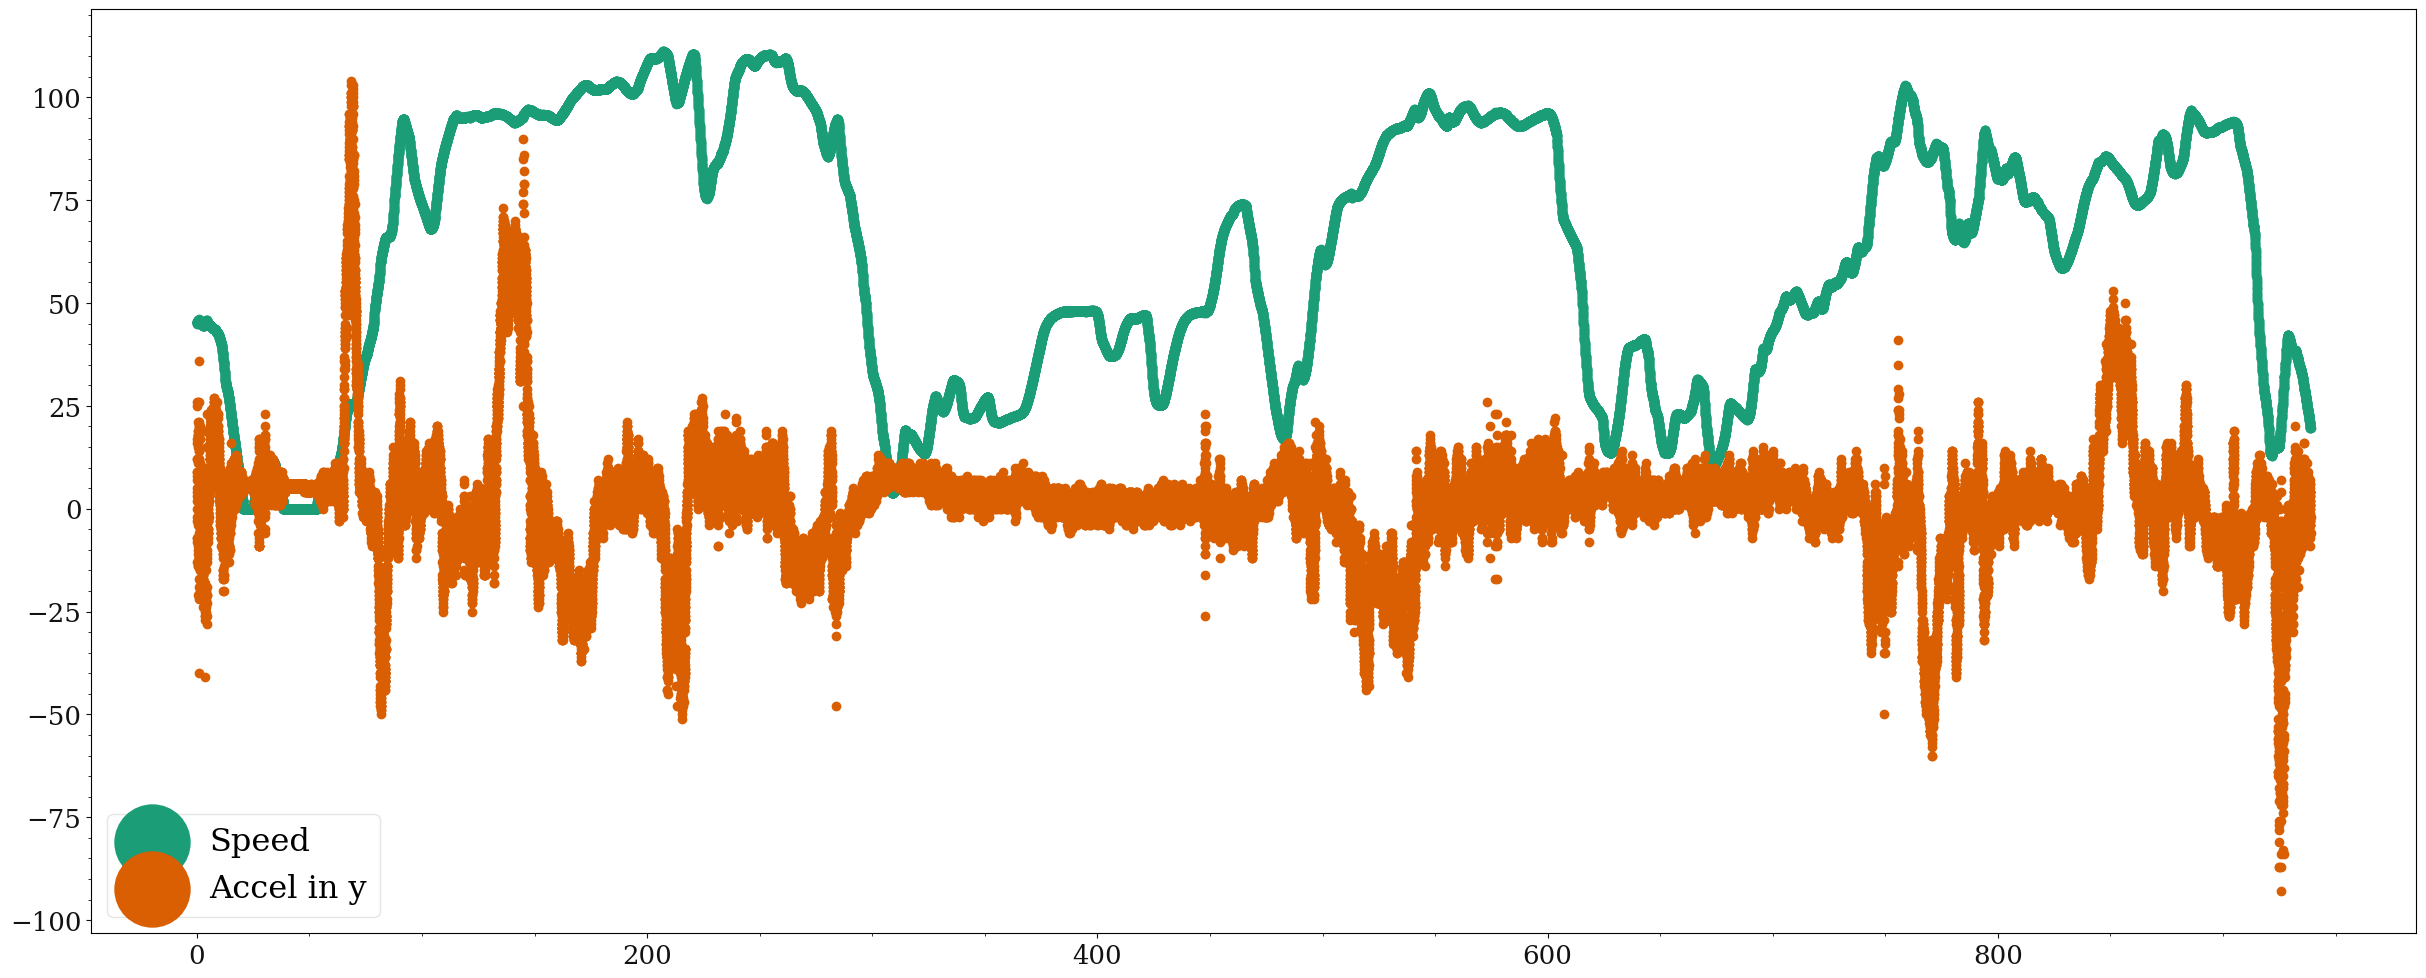

In [56]:
t0 = t_speed.iloc[0].Time
plt.scatter(x = t_speed.Time-t0, y = t_speed.Message, label='Speed')
plt.scatter(x = t_accely.Time-t0, y = t_accely.Message, label='Accel in y')
plt.legend()

What if we integrate, how does it look?